# Parametric hypothesis testing
## by the construction of appropriate confidence intervals 

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

m=5
sigma=3

number_of_samples = 50 # for calculation of only one mean

xs= stats.norm.rvs(size=number_of_samples,loc=m,scale=sigma) # samples from normal distribution
average_value = np.mean(xs) 
average_value

5.457812799847824

In [2]:
# We will test the hypothesis that E(X)=5 (H0), while H1: E(X) is different than 5
# Hence, we find the two-sided CI (assume that we don't know the variance):

# standard deviation estiamtor:
s = np.std(xs,ddof=1) # samples of the estimates of std 

alpha=0.05   # level of confidence is 1-alpha=0.95

CI=stats.t.interval(1-alpha,df=number_of_samples-1,loc=average_value, scale=s/number_of_samples**0.5)
average_value, CI

(5.457812799847824, (4.6862338079063734, 6.229391791789275))

If the point 5 belongs to the CI we cannot reject $H_0$ with the confidence level $\alpha$

In [3]:
# by changing alpha dwe get the p-value (alpha for which a bound of the interval is equal 5):

alpha=0.28  # nivo poverenja je 1-alpha

CI=stats.t.interval(1-alpha,df=number_of_samples-1,loc=average_value, scale=s/number_of_samples**0.5)
CI

(5.038385058014886, 5.877240541680762)

In [4]:
# we can obtain the p-value directly (inverse of the calculation of the CI bounds):

margin=np.abs(average_value-5)
Quantile=margin*(number_of_samples**0.5/s)

p_value=2*(1-stats.t.cdf(Quantile,df=number_of_samples-1))
    
p_value

0.23885786400041997

In [5]:
#if the p-value is relatively high (e.g. larger than 0.1) - we are quite sure that we will not reject H0

### Exercise 1: in the same way find the p-value of the variance tessting  (H0: Var=9, H1: Var different than 9)

### Exercise 2: Read temperature data from temeprature.csv, choose a city, estimate ME, and find the p-value of the appropriate hypothesis tests 

# Nonparametric hypothesis tests about the RV distribution 

## Chi-square test

In [6]:
# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0)
# f_obs are the observerd frequencies on each interval, f_exp are the expected frequencies, 
# ddof is the number of parameters that we had to estimate from the given sample

stats.chisquare([16, 18, 16, 14, 12, 12])  # if we don't specify f_exp then uniform is assumed

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)

In [7]:
#  hence, for this case, we will not reject the hypotheses H0 (data is from uniform distribution) 

## Kolmogorov and Smirnov test

In [8]:
from scipy import stats
import numpy as np

# let's test whether the points obtained using np.linspace() are samples from Normal distribution: 
x = np.linspace(-15, 15, 9)
stats.kstest(x, 'norm')  # The function ktest gives the value of the appropriate statistic (lambda from the lectures)
                         # as well as its p-value 

KstestResult(statistic=0.4443560271592436, pvalue=0.038850142705171065)

In [9]:
# hence, we can reject the hypothesis that F=F_0 with the confidence level 0.04
# - 96% we are sure in the alternative

In [10]:
# let's test if the samples from normal distribution are truly from normal:

stats.kstest(stats.norm.rvs(size=100), 'norm')

KstestResult(statistic=0.09993019742782255, pvalue=0.25390245968088876)

In [11]:
# high p-vrednost - we cannot reject H0: F=F_0 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grad='Detroit'
atributi = [grad]
df = pd.read_csv("temperature.csv",usecols=atributi)
df.head()

,Detroit
0,NaN
1,284.030000
2,284.069789
3,284.173965
4,284.278140


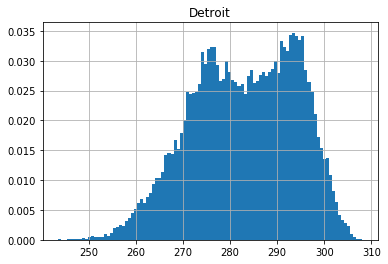

In [13]:
#histogram
hist = df.hist(normed=True,bins=100) 
plt.show()

In [14]:
# we will test if a sample of the temperatures is from normal distirbution:

sample_size=100

stats.kstest(df.sample(sample_size).dropna().values.T, cdf='norm',args=(df.dropna().values.mean(), df.dropna().values.std()))  
# u args we put estimates of the ME and STD 

KstestResult(statistic=0.9874683702430063, pvalue=0.025063259513987468)

In [15]:
# p-value is low - we reject H0 with high confidence

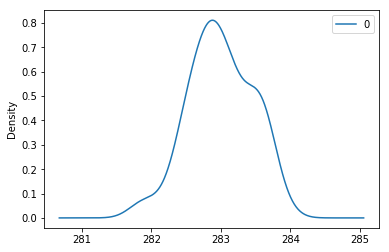

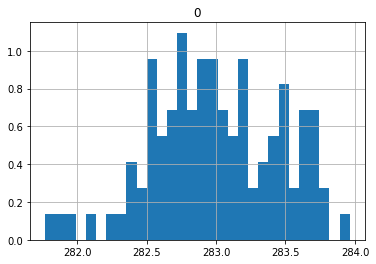

In [16]:
# Let's test the distribution of the ME estimators:

ME_estimators = []       

sample_size=500
number_of_estimator_samples=100   
for x in range(number_of_estimator_samples):
    
    sample=df.sample(sample_size)
    ME_estimators.append( sample.dropna().values.mean() )
    
    # or:
    #sample = np.random.choice(a= df.values, size=sample_size)
    #ME_estimators.append( sample.mean() )
    
# lets plot the estimated PDF  (using histogram) - we can guess that it is aspproximately normal!  
pd.DataFrame(ME_estimators).plot(kind="density")   

# histogram of the means:
hist = pd.DataFrame(ME_estimators).hist(normed=True,bins=30) 
plt.show()

In [17]:
# but lets test the H0 that these estimators have normal distribution:

stats.kstest(ME_estimators, cdf='norm',args=(df.dropna().values.mean(), df.dropna().values.std()/sample_size**0.5))

KstestResult(statistic=0.06237779633926914, pvalue=0.8313215219506321)

In [18]:
# Do we reject H0 or not (based on the p-value)?